# 1.0. IMPORTS

In [24]:
import json
import psycopg2

import numpy    as np
import pandas   as pd
import seaborn  as sns

from IPython.display    import Image
from matplotlib         import pyplot as plt

from HelperFunctions    import jupyter_settings

In [2]:
jupyter_settings()

## 1.1. Carregando dados

In [11]:
# Lendo a query
query = open('../querys/query_01.sql', 'r').read()

# Lendo as credenciais do banco
conexoes = json.load(open('../credentials/conexoes.json', 'r'))

# Conectando no banco
conn = psycopg2.connect(
    host    =conexoes['host'],
    database=conexoes['database'],
    user    =conexoes['user'],
    password=conexoes['password']
)

# Lendo a query em um dataframe
df = pd.read_sql_query(query, conn)

# Fechando conexão
conn.close()

# Exportando dados
df.to_csv('../data/df_raw.csv', index=False, sep=';')

# 2.0. DESCRIÇÃO DOS DADOS

In [3]:
df = pd.read_csv('../data/df_raw.csv', sep=';')

In [4]:
df.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.00,152.00,1,< 1 Year,Yes,0,23367.00,249,0
1,13,Female,41,15.00,14.00,1,1-2 Year,No,1,31409.00,221,0
2,18,Female,25,35.00,152.00,1,< 1 Year,No,1,46622.00,299,0
3,31,Female,26,8.00,160.00,1,< 1 Year,No,0,2630.00,136,0
4,39,Male,45,8.00,124.00,1,1-2 Year,Yes,0,42297.00,264,0


## 2.1. Dimensão dos dados

In [5]:
print('Número de linhas: {}'.format(df.shape[0]))
print('Número de colunas: {}'.format(df.shape[1]))

Número de linhas: 381109
Número de colunas: 12


## 2.2. Tipo das variáveis

In [6]:
df.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

## 2.3. Verificando NAs

In [7]:
df.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

## 2.4. Balanceamento dos Dados

In [8]:
df['response'].value_counts(normalize=True).apply(lambda x: '{:.4}'.format(x))

0    0.8774
1    0.1226
Name: response, dtype: object

12.26% dos clientes têm interesse em obter o seguro para o veículo

## 2.5. Estatística Descritiva

In [10]:
num_attributes = df.select_dtypes(['int64', 'float64'])
cat_attributes = df.select_dtypes(exclude=['int64', 'float64'])

### 2.5.1. Variáveis Numéricas

In [11]:
# Tendência central - média e mediana
tc1 = pd.DataFrame(num_attributes.apply(np.mean)).T
tc2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersão - min, max, range, média, mediana, desvio padrão, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.min)).T
d2 = pd.DataFrame(num_attributes.apply(np.max)).T
d3 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d4 = pd.DataFrame(num_attributes.apply(np.std)).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenando dataframes
m = pd.concat([d1, d2, d3, tc1, tc2, d4, d5, d6]).T.reset_index()
m.columns = ['atributos', 'min', 'max', 'range', 'media', 'mediana', 'desvio_padrao', 'skew', 'kurtosis']

m

,atributos,min,max,range,media,mediana,desvio_padrao,skew,kurtosis
0,id,1.00,381109.00,381108.00,190555.00,190555.00,110016.69,-0.00,-1.20
1,age,20.00,85.00,65.00,38.82,36.00,15.51,0.67,-0.57
2,region_code,0.00,52.00,52.00,26.39,28.00,13.23,-0.12,-0.87
3,policy_sales_channel,1.00,163.00,162.00,112.03,133.00,54.20,-0.90,-0.97
4,driving_license,0.00,1.00,1.00,1.00,1.00,0.05,-21.60,464.35
5,previously_insured,0.00,1.00,1.00,0.46,0.00,0.50,0.17,-1.97
6,annual_premium,2630.00,540165.00,537535.00,30564.39,31669.00,17213.13,1.77,34.00
7,vintage,10.00,299.00,289.00,154.35,154.00,83.67,0.00,-1.20
8,response,0.00,1.00,1.00,0.12,0.00,0.33,2.30,3.30


In [13]:
num_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.00,190555.00,110016.84,1.00,95278.00,190555.00,285832.00,381109.00
age,381109.00,38.82,15.51,20.00,25.00,36.00,49.00,85.00
region_code,381109.00,26.39,13.23,0.00,15.00,28.00,35.00,52.00
policy_sales_channel,381109.00,112.03,54.20,1.00,29.00,133.00,152.00,163.00
driving_license,381109.00,1.00,0.05,0.00,1.00,1.00,1.00,1.00
previously_insured,381109.00,0.46,0.50,0.00,0.00,0.00,1.00,1.00
annual_premium,381109.00,30564.39,17213.16,2630.00,24405.00,31669.00,39400.00,540165.00
vintage,381109.00,154.35,83.67,10.00,82.00,154.00,227.00,299.00
response,381109.00,0.12,0.33,0.00,0.00,0.00,0.00,1.00


### 2.5.2. Variáveis Categóricas

In [19]:
cat_attributes.describe().T

,count,unique,top,freq
gender,381109,2,Male,206089
vehicle_age,381109,3,1-2 Year,200316
vehicle_damage,381109,2,Yes,192413


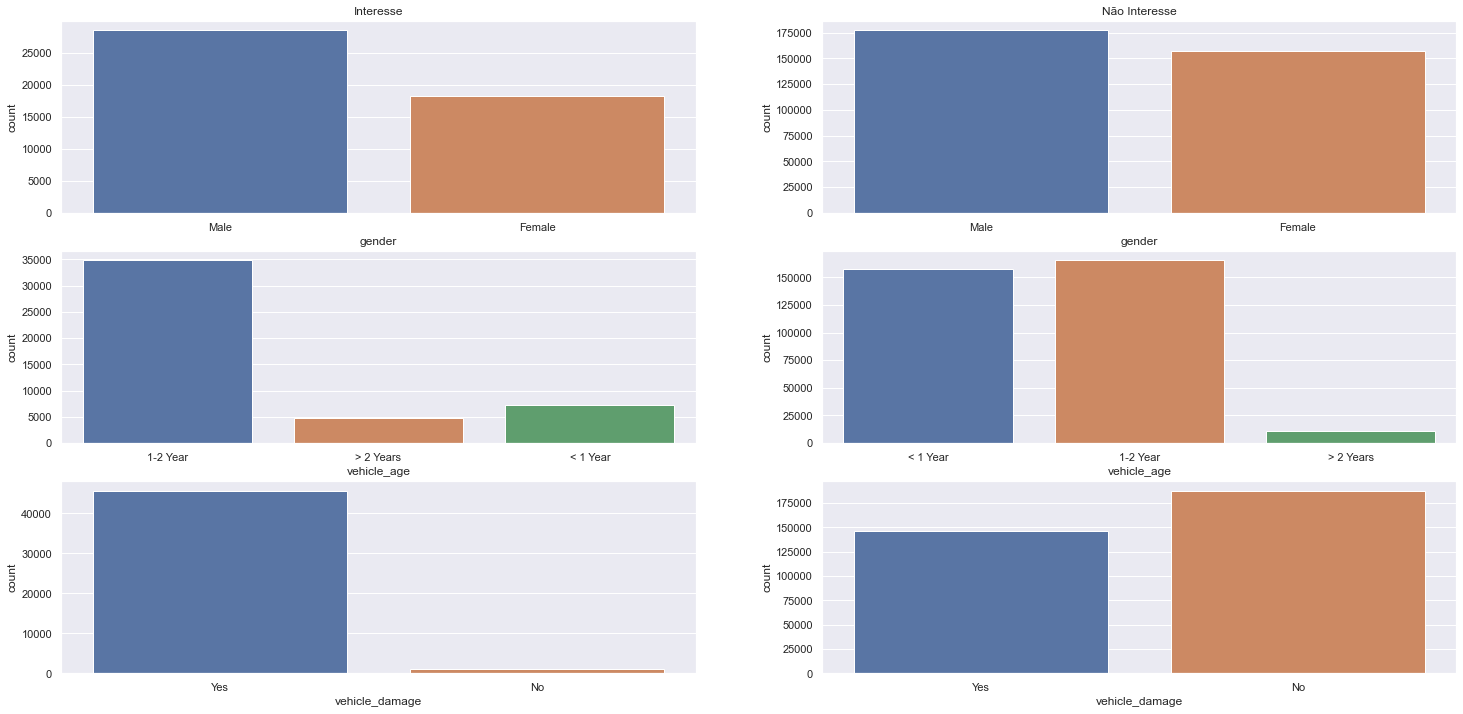

In [82]:
# Verificando boxplot em relação a variável resposta
# Interesse
aux1 = df.query('response == 1')
# Não interesse
aux2 = df.query('response != 1')

# Gender
plt.subplot(3, 2, 1)
sns.countplot(x='gender', data=aux1).set(title='Interesse');

plt.subplot(3, 2, 2)
sns.countplot(x='gender', data=aux2).set(title='Não Interesse');

# Vehicle Age
plt.subplot(3, 2, 3)
sns.countplot(x='vehicle_age', data=aux1);

plt.subplot(3, 2, 4)
sns.countplot(x='vehicle_age', data=aux2);

# Vehicle Damage
plt.subplot(3, 2, 5)
sns.countplot(x='vehicle_damage', data=aux1);

plt.subplot(3, 2, 6)
sns.countplot(x='vehicle_damage', data=aux2);

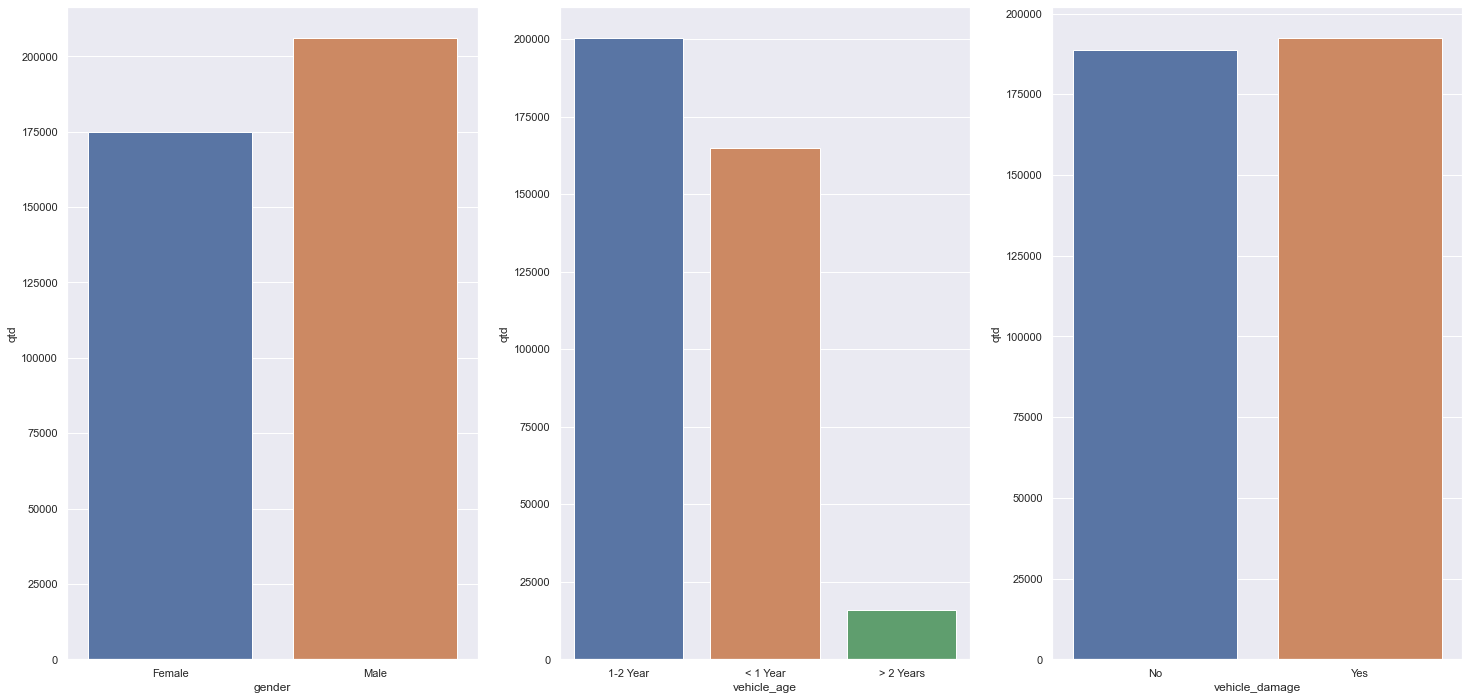

In [ ]:
# Verificando a representatividade das categorias
plt.subplot(1, 3, 1)
aux = cat_attributes[['gender', 'vehicle_age']].groupby(['gender']).count().reset_index().rename(columns={'vehicle_age': 'qtd'})
sns.barplot(x='gender', y='qtd', data=aux);

plt.subplot(1, 3, 2)
aux = cat_attributes[['vehicle_age', 'gender']].groupby(['vehicle_age']).count().reset_index().rename(columns={'gender': 'qtd'})
sns.barplot(x='vehicle_age', y='qtd', data=aux);

plt.subplot(1, 3, 3)
aux = cat_attributes[['vehicle_damage', 'vehicle_age']].groupby(['vehicle_damage']).count().reset_index().rename(columns={'vehicle_age': 'qtd'})
sns.barplot(x='vehicle_damage', y='qtd', data=aux);

In [21]:
# Exportando dados
df.to_csv('../data/df2.csv', index=False, sep=';')

# 3.0. FEATURE ENGINEERING

In [22]:
df = pd.read_csv('../data/df2.csv', sep=';')

## 3.1. Mapa mental de hipóteses

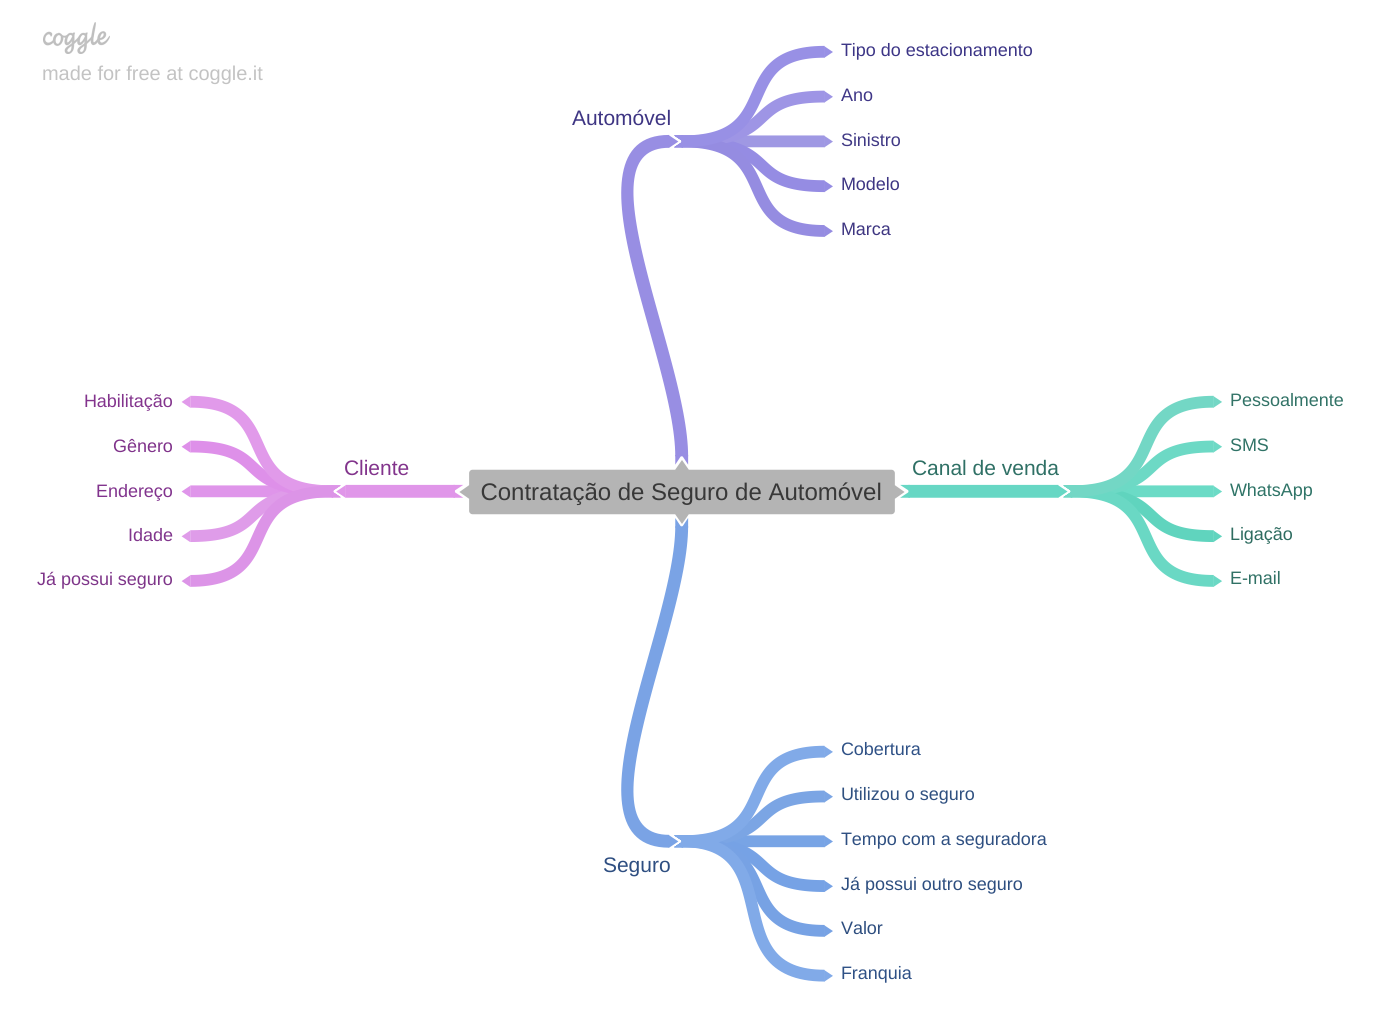

In [25]:
Image('../img/mindmap.png')